In [1]:
from bioinfokit.analys import stat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from patsy import dmatrices
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
import sklearn.metrics
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import normal_ad

plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)
OUTDATED_IGNORE=1

This is the same dataset that I used to create the linear regression model, but then I did not perform feature engineering on the data. In this analysis I will apply feature engineering techniques and see what changes.

The Diamonds dataset https://www.kaggle.com/datasets/shivam2503/diamonds<br>
The dataset contains data on 53,940 round-cut diamonds with 10 features:
1. carat - weight of the diamond (numerical data),
2. cut - cut quality of the cut (Fair, Good, Very Good, Premium, Ideal) (categorical data),
3. color - color diamond colour, from J (worst) to D (best) (caegorical data),
4. clarity - clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) (categorical data),
5. depth - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)(numerical data),
6. table - table width of top of diamond relative to widest point (43--95) (numerical data),
7. price - price in US dollars,(numerical data),
8. x - length in mm (numerical data), 
9. y - width in mm (numerical data),
10. z - depht in mm (numerical data).

In [2]:
data_frame = pd.read_csv('./Diamonds Prices2022.csv',index_col=0)
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53943 entries, 1 to 53943
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [3]:
data_frame

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


### Carat - transorming the distribiution

Looking at the histogram for the carat variable we see that it is not a normal distribution, let's try to do a Box-Cox transformation of the distribution.

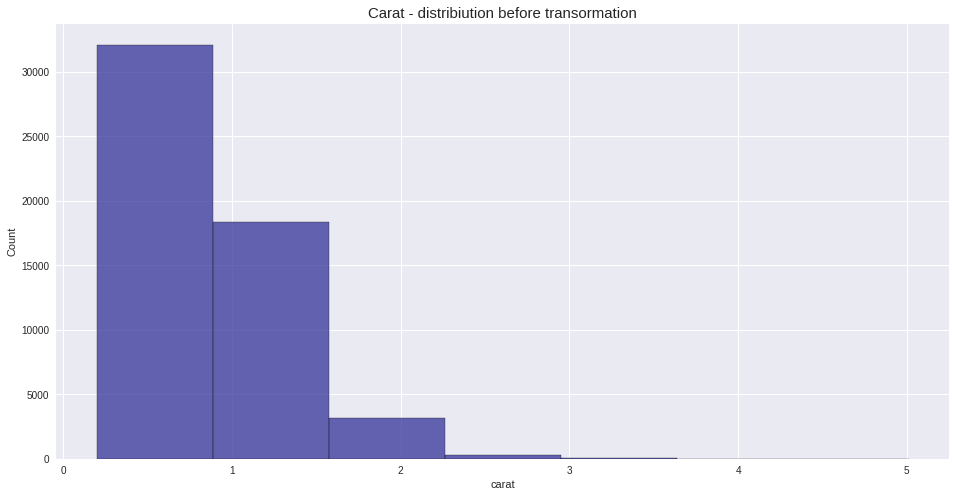

In [4]:
sns.histplot(x='carat',data=data_frame,bins=7, color='#333399')
plt.title('Carat - distribiution before transormation', size=15)
plt.show()

In [5]:
#transform the distribution into normal shape using the Box-Cox method
transformed_carat, lambda_ = boxcox(data_frame['carat'])

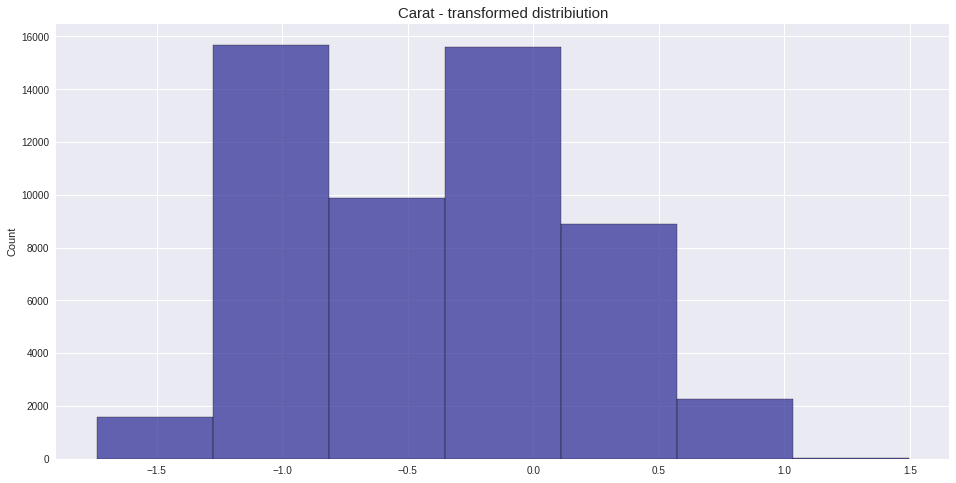

In [6]:
sns.histplot(x=transformed_carat,data=data_frame,bins=7, color='#333399')
plt.title('Carat - transformed distribiution', size=15)
plt.show()

After using the Box Cox method, the transformed distribution of the carat variable has the shape of a normal distribution.

### Price - transorming the distribiution

I'm going to transorfm also the price distribition with the same Box-Cox method.

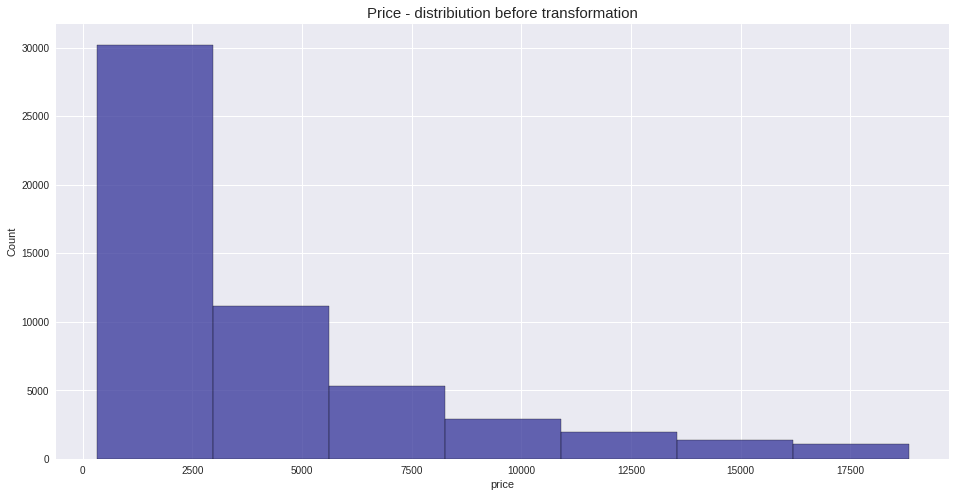

In [7]:
sns.histplot(x='price',data=data_frame,bins=7, color='#333399')
plt.title('Price - distribiution before transformation', size=15)
plt.show()

In [8]:
#transform the distribution into normal shape using the Box-Cox method
transformed_price, lambda__price = boxcox(data_frame['price'])

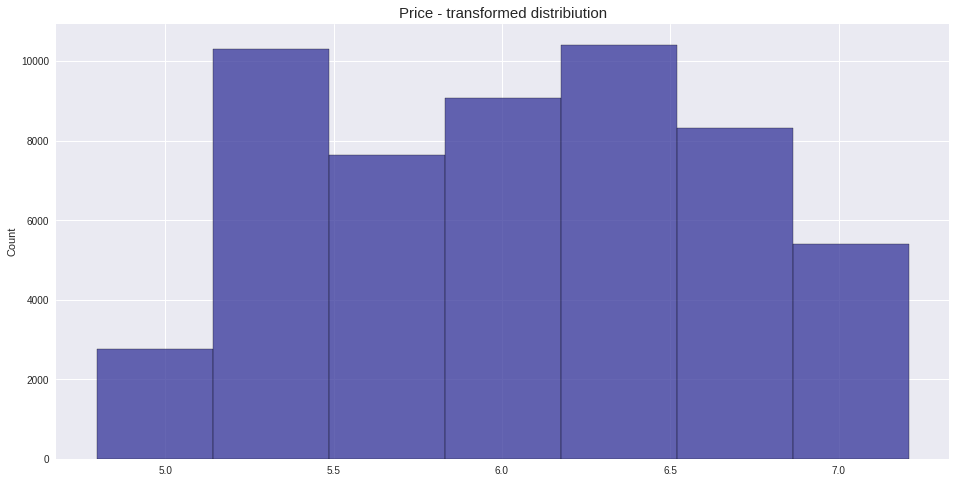

In [9]:
sns.histplot(x=transformed_price,data=data_frame,bins=7, color='#333399')
plt.title('Price - transformed distribiution', size=15)
plt.show()

### Cut - label encoding

In [12]:
#Label encoding for variable cut, it will order them in the order - Fair - the worst cut, Premium - the best cut
cut_names =['Fair', 'Good', 'Very Good', 'Ideal','Premium']
cut_labels = pd.factorize(cut_names)[0]
cut_labels

array([0, 1, 2, 3, 4])

In [13]:
dict(zip(cut_names, cut_labels))

{'Fair': 0, 'Good': 1, 'Very Good': 2, 'Ideal': 3, 'Premium': 4}

In [14]:
data_frame['cut'] = data_frame['cut'].map(dict(zip(cut_names, cut_labels)))

In [15]:
data_frame

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,3,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,1,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53939,0.86,4,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,3,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53941,0.71,4,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53942,0.71,4,F,SI1,59.8,62.0,2756,5.74,5.73,3.43



### Color - label encoding

In [16]:
#Label encoding, we can also encode the colors of diamonds using Label endocding,
# because with the variable color we can order theoretically the most valuable diamonds are those with color D, 
# and the least valuable are those with color J, between them we keep the alphabetical order

In [17]:
color_names =['J', 'I', 'H', 'G','F','E','D']
color_labels = pd.factorize(color_names)[0]
color_labels

array([0, 1, 2, 3, 4, 5, 6])

In [18]:
data_frame['color'] = data_frame['color'].map(dict(zip(color_names, color_labels)))

In [19]:
data_frame

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,3,5,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,5,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,1,5,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,1,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,1,0,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53939,0.86,4,2,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,3,6,SI2,62.2,55.0,2757,5.83,5.87,3.64
53941,0.71,4,5,SI1,60.5,55.0,2756,5.79,5.74,3.49
53942,0.71,4,4,SI1,59.8,62.0,2756,5.74,5.73,3.43


### Clarity - label encoding

In [20]:
#We can also order this categorical variable, since diamonds have a clarity scale 
data_frame['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [21]:
clarity_names =['I1', 'VVS1','VVS2', 'VS1', 'VS2','SI1','SI2','IF']
clarity_labels = pd.factorize(clarity_names)[0]
clarity_labels

array([0, 1, 2, 3, 4, 5, 6, 7])

In [22]:
data_frame['clarity'] = data_frame['clarity'].map(dict(zip(clarity_names, clarity_labels)))

In [23]:
data_frame

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,3,5,6,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,5,5,59.8,61.0,326,3.89,3.84,2.31
3,0.23,1,5,3,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,1,4,62.4,58.0,334,4.20,4.23,2.63
5,0.31,1,0,6,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53939,0.86,4,2,6,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,3,6,6,62.2,55.0,2757,5.83,5.87,3.64
53941,0.71,4,5,5,60.5,55.0,2756,5.79,5.74,3.49
53942,0.71,4,4,5,59.8,62.0,2756,5.74,5.73,3.43


Now I will create a linear regression models for the carat and price variables before and after the distribution transformation and then I will check the Linear regression assumptions for both of them.

In [24]:
# Step 1 - create a linear regression model for the variables carat and price.

lin_X = data_frame[['carat']] 
lin_y = data_frame[['price']] #target variable

model = LinearRegression()
model.fit(lin_X, lin_y)

LinearRegression()

In [25]:
# Step 2 create of a linear regression model but for variables for which I performed the distribution transformation

lin_X_t = transformed_carat.reshape(-1,1) 
lin_y_t = transformed_price #target variable

model_t = LinearRegression()
model_t.fit(lin_X_t, lin_y_t)

LinearRegression()

### Assumption 1. Linear relationship 
I will make scatter plot for both model to see how it looks before and after the distribiution transformation

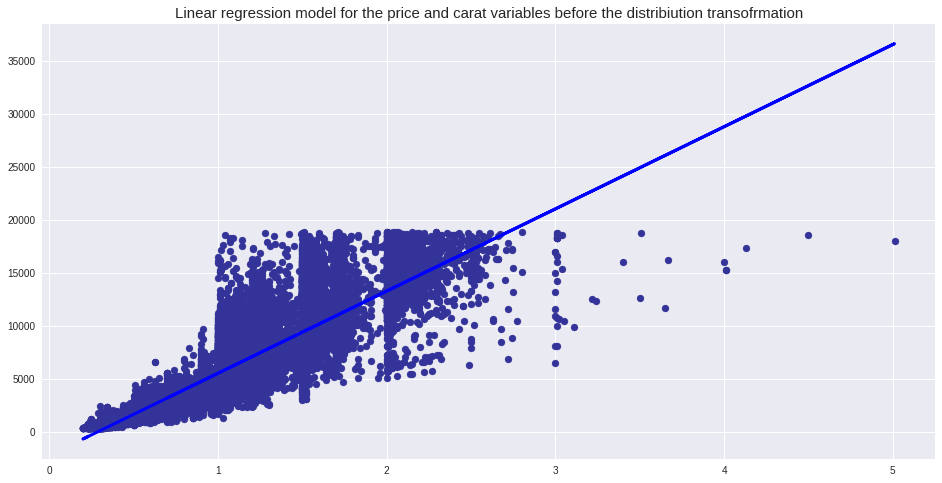

In [26]:
lin_y_pred = model.predict(lin_X)#pedict
plt.scatter(lin_X, lin_y, color='#333399')
plt.plot(lin_X.values.flatten(), lin_y_pred.flatten(), color="b", linewidth=3)
plt.title('Linear regression model for the price and carat variables before the distribiution transofrmation', size=15)
plt.show()

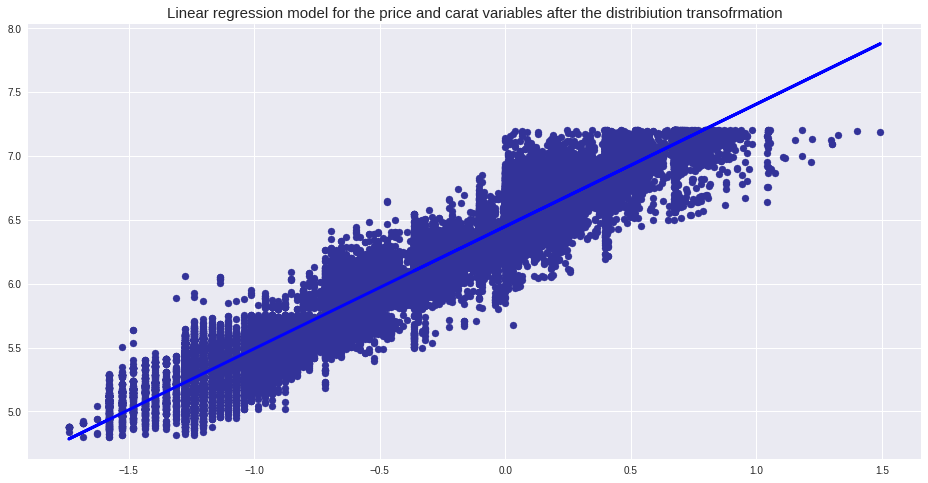

In [27]:
lin_y_pred_t = model_t.predict(lin_X_t)#predict
plt.scatter(lin_X_t, lin_y_t, color='#333399')
plt.plot(lin_X_t, lin_y_pred_t.flatten(), color="b", linewidth=3)
plt.title('Linear regression model for the price and carat variables after the distribiution transofrmation', size=15)
plt.show()

In [28]:
#count a coefficient of determination for the model with the variables before the distribiution transofrmation
linear_r2 = model.score(lin_X, lin_y)
print('R^2: {0}'.format(linear_r2))

R^2: 0.8493304833200087


In [29]:
#count a coefficient of determination for the model with the variables after the distribiution transofrmation
linear_r2_t = model_t.score(lin_X_t, lin_y_t)
print('R^2: {0}'.format(linear_r2_t))

R^2: 0.9334778540907834


In [30]:
mse = sklearn.metrics.mean_squared_error(lin_y_pred_t, lin_y_t)  #odwrócić wartości i sprawdzić
mse

0.024036663183470926

The coefficient of determination for the model with the variables after the distribiution transofrmation has a higher value which means that the model with the variables after the distribiution transofrmation is better than the model with the variables before the distribiution transofrmation. Also, the scatterplot for the second model with the variables after the distribiution transofrmation looks much better - the variables line up along the line.

### Assumption 2 - The residuals are independent.


In [31]:
#calculate residuals for the model with the variables before the distribiution transofrmation
df_results = pd.DataFrame({'Actual': lin_y.values.flatten(), 'Predicted': lin_y_pred.flatten()})
df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

In [32]:
##calculate residuals for the model with the variables after the distribiution transofrmation
df_results_t = pd.DataFrame({'Actual': lin_y_t, 'Predicted': lin_y_pred_t.flatten()})
df_results_t['Residuals'] = abs(df_results_t['Actual']) - abs(df_results_t['Predicted'])

In [33]:
#perform Durbin-Watson test to check if the assumption is met - the model for the variables before the distribiution transofrmation
durbinWatson = durbin_watson(df_results['Residuals'])
print('Durbin-Watson:', durbinWatson)

Durbin-Watson: 0.9908702335695819


In [34]:
#perform Durbin-Watson test to check if the assumption is met - the model for the variables after the distribiution transofrmation
durbinWatson_transformed = durbin_watson(df_results_t['Residuals'])
print('Durbin-Watson_transformed:', durbinWatson_transformed)

Durbin-Watson_transformed: 1.186572430186393


In [35]:
def durbin_watson_check(durbin_watson_result):
    if durbinWatson < 1.5:
        print('Autocorrelation positive')
    elif durbinWatson > 2.5:
        print('Autocorrelation negative')
    else:
        print('No autocorrelation')

In [36]:
durbin_watson_check(durbinWatson)

Autocorrelation positive


In [37]:
durbin_watson_check(durbinWatson_transformed)

Autocorrelation positive


For both models there is a positive autocorrelation. For the model for the variables after the distribiution transformation the result is better but there is still autocorrelation.

### Assumption 3 - Normality of residuals

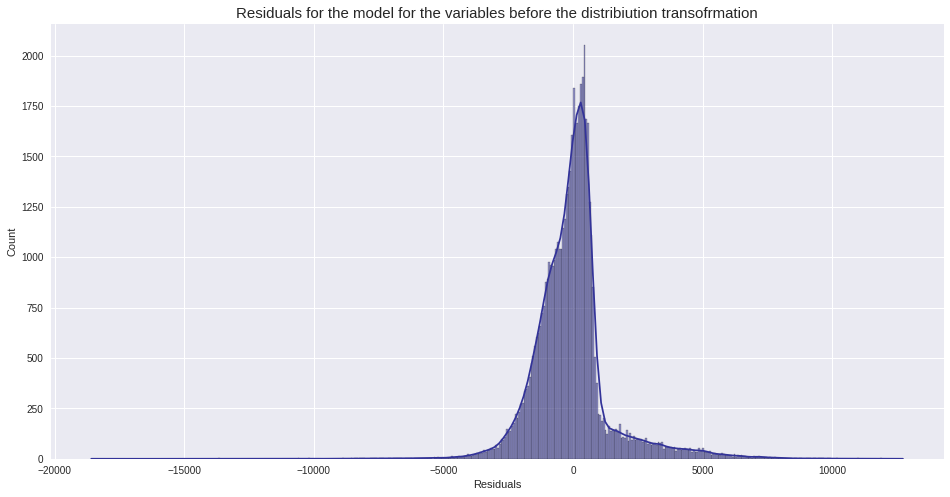

In [38]:
sns.histplot(x='Residuals',data=df_results,kde=True, color='#333399')
plt.title('Residuals for the model for the variables before the distribiution transofrmation', size=15)
plt.show()

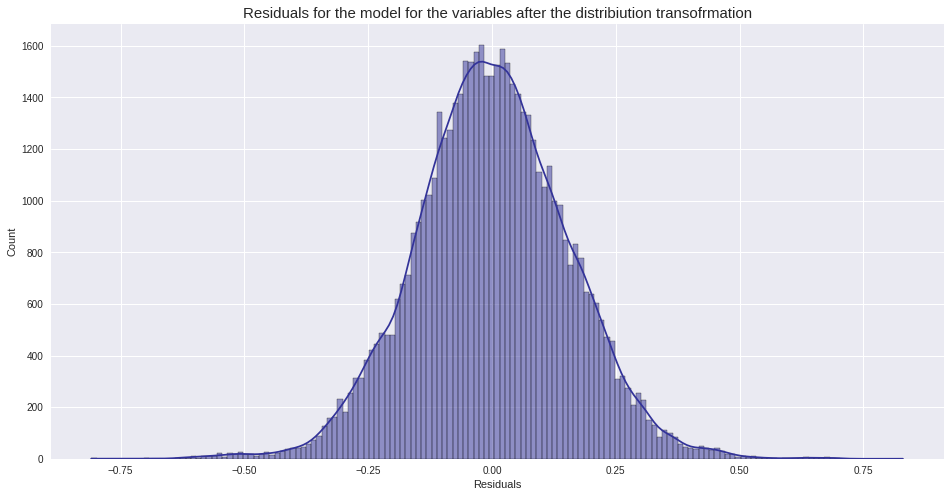

In [39]:
sns.histplot(x='Residuals',data=df_results_t,kde=True, color='#333399')
plt.title('Residuals for the model for the variables after the distribiution transofrmation', size=15)
plt.show()

Checking the normality of residuals for both models by plotting the histogram we can see that for the residuals in the model for variables after the distribiution transformation distribiution looks like a normal distriubiution.